In [2]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline

/var/folders/f4/w1jmmbtn33l34957t7w1qcjc0000gn/T/ipykernel_32638/2729794456.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Hugging Face Dataset Visualization

### Read the Dataset 

In [35]:
hf = pd.read_csv('data/Cleaning/HuggingFace_Dataset.csv',on_bad_lines='skip')
hf.head()

,label;clean_tweet;Hash Words;;
0,0;second round beat de bakker hardworkpaysoff ...
1,0;pizza base alreadi cob oven build thank supp...
2,0;club uk reunion date come soon;#club;;
3,0;flagday2016 flag day 2016 30 photo buy thing...
4,0;kid throw 7478 like futur anyth 12 year old ...


In [36]:
hf= hf.rename(columns={'label;clean_tweet;Hash Words;;': 'temp'})
hf= hf.temp.str.split(";",expand=True)
hf

,0,1,2,3,4
0,0,second round beat de bakker hardworkpaysoff at...,#hardworkpaysoff #atpchallengeour #fighta|,,
1,0,pizza base alreadi cob oven build thank suppli...,No hashtags,,
2,0,club uk reunion date come soon,#club,,
3,0,flagday2016 flag day 2016 30 photo buy thing f...,#flagday2016 #flag #day #2016 #(30 #photos),,
4,0,kid throw 7478 like futur anyth 12 year old wi...,No hashtags,,
...,...,...,...,...,...
30941,0,note stori get sympathi hard grind get result ...,#story #sympathy #hard #grind_ #results #grinda|,,
30942,0,sneak peek content look great,No hashtags,,
30943,0,someday mccain realli answer question complet ...,No hashtags,,
30944,0,mxm igazi bore get intens show end nou one mus...,#igazi,,


In [37]:
hf.drop(hf.columns[[3,4]],axis=1,inplace=True)

In [38]:
hf

,0,1,2
0,0,second round beat de bakker hardworkpaysoff at...,#hardworkpaysoff #atpchallengeour #fighta|
1,0,pizza base alreadi cob oven build thank suppli...,No hashtags
2,0,club uk reunion date come soon,#club
3,0,flagday2016 flag day 2016 30 photo buy thing f...,#flagday2016 #flag #day #2016 #(30 #photos)
4,0,kid throw 7478 like futur anyth 12 year old wi...,No hashtags
...,...,...,...
30941,0,note stori get sympathi hard grind get result ...,#story #sympathy #hard #grind_ #results #grinda|
30942,0,sneak peek content look great,No hashtags
30943,0,someday mccain realli answer question complet ...,No hashtags
30944,0,mxm igazi bore get intens show end nou one mus...,#igazi


In [40]:

hf.rename(columns={hf.columns[0]: 'label'},inplace=True)
hf.rename(columns={hf.columns[1]: 'text'},inplace=True)
hf.rename(columns={hf.columns[2]: 'hashtags'},inplace=True)

In [41]:
hf

,label,text,hashtags
0,0,second round beat de bakker hardworkpaysoff at...,#hardworkpaysoff #atpchallengeour #fighta|
1,0,pizza base alreadi cob oven build thank suppli...,No hashtags
2,0,club uk reunion date come soon,#club
3,0,flagday2016 flag day 2016 30 photo buy thing f...,#flagday2016 #flag #day #2016 #(30 #photos)
4,0,kid throw 7478 like futur anyth 12 year old wi...,No hashtags
...,...,...,...
30941,0,note stori get sympathi hard grind get result ...,#story #sympathy #hard #grind_ #results #grinda|
30942,0,sneak peek content look great,No hashtags
30943,0,someday mccain realli answer question complet ...,No hashtags
30944,0,mxm igazi bore get intens show end nou one mus...,#igazi


In [42]:
hf.label.value_counts()

0    28859
1     2087
Name: label, dtype: int64

### Boxplot of the Label Distribution 

In [43]:
hf['text length'] = hf['text'].apply(len)

<AxesSubplot:xlabel='label', ylabel='text length'>

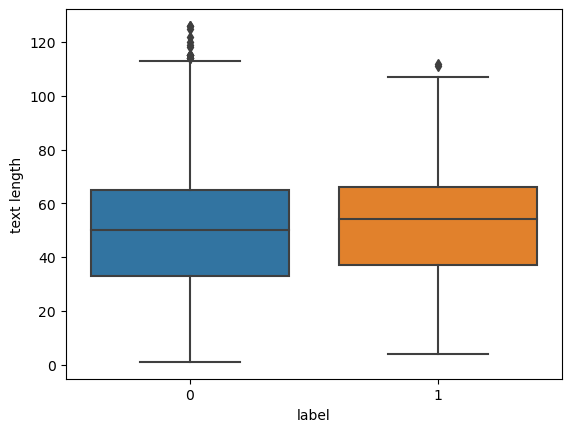

In [44]:
sb.boxplot(x='label', y='text length', data=hf)

### Wordcloud of the Most Popular Hashtags of Each Tweet Type

In [57]:
hf

,label,text,hashtags,text length
0,0,second round beat de bakker hardworkpaysoff at...,#hardworkpaysoff #atpchallengeour #fighta|,66
1,0,pizza base alreadi cob oven build thank suppli...,No hashtags,61
2,0,club uk reunion date come soon,#club,30
3,0,flagday2016 flag day 2016 30 photo buy thing f...,#flagday2016 #flag #day #2016 #(30 #photos),58
4,0,kid throw 7478 like futur anyth 12 year old wi...,No hashtags,57
...,...,...,...,...
30941,0,note stori get sympathi hard grind get result ...,#story #sympathy #hard #grind_ #results #grinda|,52
30942,0,sneak peek content look great,No hashtags,29
30943,0,someday mccain realli answer question complet ...,No hashtags,57
30944,0,mxm igazi bore get intens show end nou one mus...,#igazi,75


In [58]:
hf.dtypes

label          object
text           object
hashtags       object
text length     int64
dtype: object

In [59]:
non_hate = hf[hf['label'].astype(int) == 0]

In [60]:
non_hate = non_hate[non_hate['hashtags'] != 'No hashtags']


In [61]:
non_hate

,label,text,hashtags,text length
0,0,second round beat de bakker hardworkpaysoff at...,#hardworkpaysoff #atpchallengeour #fighta|,66
2,0,club uk reunion date come soon,#club,30
3,0,flagday2016 flag day 2016 30 photo buy thing f...,#flagday2016 #flag #day #2016 #(30 #photos),58
6,0,l n g w e e k e n work eastcoast melbourn mua ...,#work #eastcoast #melbourne #mua #wednesday #a...,70
7,0,goddaught fast asleep prosecco hand film tvper...,#sundaynightsin #selfie,74
...,...,...,...,...
30938,0,thank inspir thank posit,#thankful #positive,24
30939,0,peppa pig bird lollipop finger famili nurseri ...,#peppa #lollipop #finger #nursery,61
30940,0,happi father day dad fathersday famili cooldad,#fathersday #family #cooldad,46
30941,0,note stori get sympathi hard grind get result ...,#story #sympathy #hard #grind_ #results #grinda|,52


In [62]:
non_hate_wordcloud = WordCloud().generate(' '.join(non_hate['hashtags']))

(-0.5, 399.5, 199.5, -0.5)

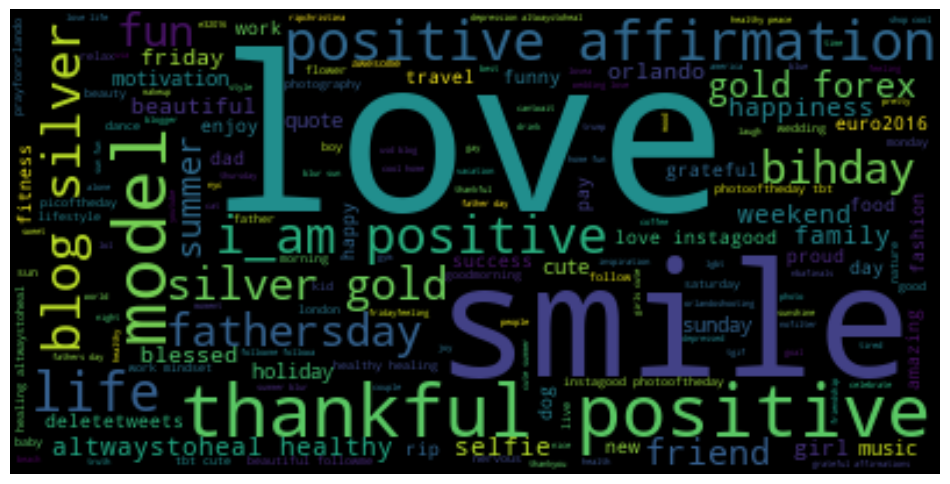

In [63]:
plt.figure(figsize= (12,8))
plt.imshow(non_hate_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [65]:
hate = hf[hf['label'].astype(int) == 1]

In [66]:
hate = hate[hate['hashtags'] != 'No hashtags']


In [67]:
hate

,label,text,hashtags,text length
25,1,ha good riddanc blacklivesmatt,#blacklivesmatter,30
26,1,hispan feel like stomp listen retweet boricuaa,#hispanic #retweet #boricuaa|,46
98,1,excel idea dig deep hang high treason aidingen...,#treason #aidingenemies #fraud #coverups #beng...,82
132,1,trump suppoer go make america great hate hea,#trump #america #hate,44
187,1,nobdi want 2 kiss lie conaist homophob islamap...,#lying #conaist #homophobic #islamaphobic #rus...,76
...,...,...,...,...
30908,1,maga maga3x moron tweet sewag understand hilla...,#maga #maga3x #moron #hillarylost.a|,53
30910,1,opinion racism degrad peopl base race justifi ...,#opinion. #degrading #discrimination #violence...,76
30912,1,enough 2 say notmypr wtf2016 neverump unpresid...,#notmypres #wtf2016 #neverump #unpresidented #...,52
30915,1,great countri australia israel australian opki...,#australia #israel #australian #opkillingbaya#...,88


In [68]:
hate_wordcloud = WordCloud().generate(' '.join(hate['hashtags']))

(-0.5, 399.5, 199.5, -0.5)

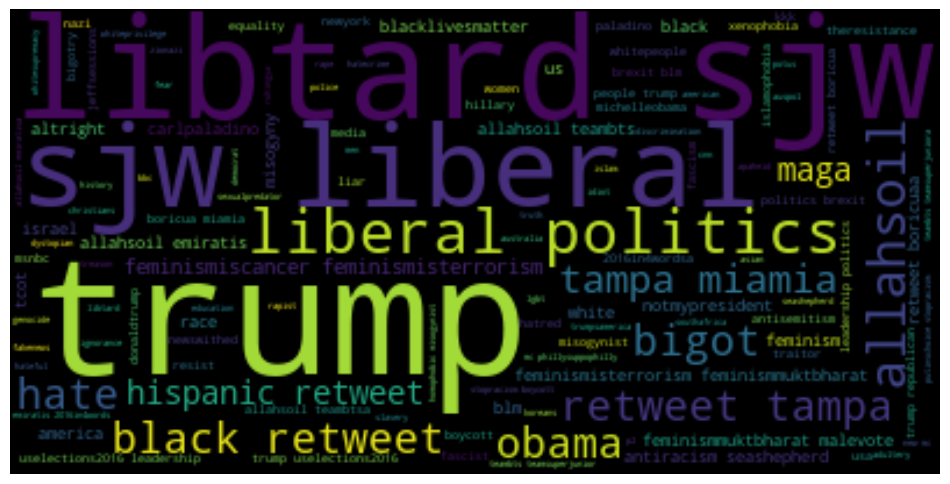

In [69]:
plt.figure(figsize= (12,8))
plt.imshow(hate_wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

### Frequency Distribution of the Top 25 Tokens 

In [70]:
word_frequency_non_hate = non_hate['text'].str.split(expand=True).stack().value_counts()

In [71]:
print(word_frequency_non_hate.head(25))

love       2672
day        1859
happi      1682
thank      1304
posit       945
time        920
life        904
smile       788
go          783
get         782
today       746
dd          693
new         685
ddd         684
make        654
bihday      629
like        589
take        576
want        573
healthi     572
work        564
friend      546
father      544
beauti      530
fun         526
dtype: int64


In [72]:
non_hate_frequency = word_frequency_non_hate.head(25)

[]

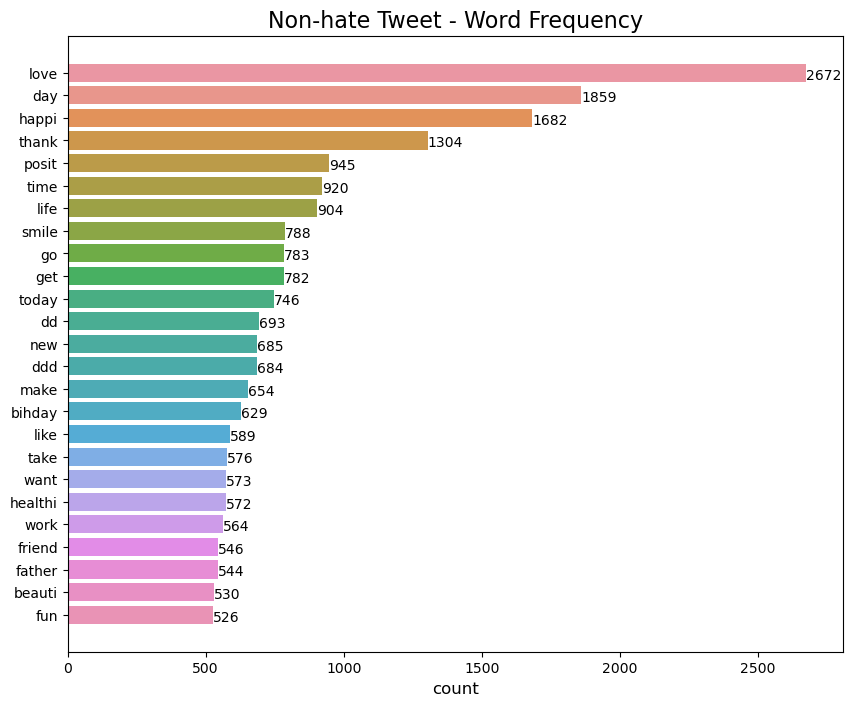

In [74]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = non_hate_frequency.values, y = non_hate_frequency.index)
plt.title('Non-hate Tweet - Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

In [75]:
word_frequency_hate = hate['text'].str.split(expand=True).stack().value_counts()

In [76]:
hate_frequency = word_frequency_hate.head(25)
hate_frequency

trump        171
libtard      147
like         105
black         98
polit         93
allahsoil     92
white         87
liber         79
might         75
sjw           74
peopl         64
hate          64
racist        62
obama         60
listen        60
retweet       59
feel          58
woman         53
new           48
u             48
stomp         47
say           45
america       45
would         40
miamia        37
dtype: int64

[]

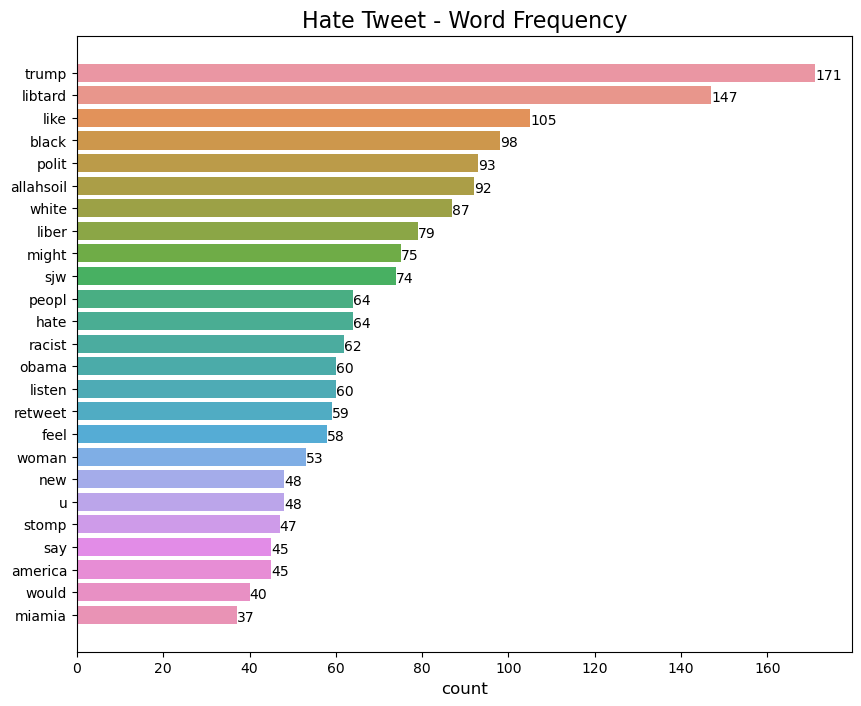

In [77]:
plt.figure(figsize=(10,8))
ax = sb.barplot(x = hate_frequency.values, y = hate_frequency.index)
plt.title('Hate Tweet - Word Frequency', fontsize=16)
plt.xlabel('count', fontsize=12)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.5), ha='left', va='center')
plt.plot()

### Aristotle Dataset

In [ ]:
aris = pd.read_csv('data/Cleaning/Aristotle_Dataset.csv',on_bad_lines='skip')
aris.head()

In [ ]:
aris= aris.rename(columns={'label;clean_tweet;Hash Words': 'temp'})
aris= aris.temp.str.split(";",expand=True)
aris.columns = ['label', 'text', 'hashtags']
aris

In [ ]:
aris.label.value_counts()

### Hugging Face Dataset 

In [ ]:
hf = pd.read_csv('data/Cleaning/HuggingFace_Dataset.csv',on_bad_lines='skip')
hf.columns

In [ ]:
hf= hf.rename(columns={'label;clean_tweet;Hash Words;;': 'temp'})
hf= hf.temp.str.split(";",expand=True)
hf.columns = ['label', 'text', 'hashtags','temp1','temp2']
hf.drop(columns=['temp1','temp2'],inplace=True)

In [ ]:
hf

In [ ]:
hf.label.value_counts()

### Copenhagen Dataset 

In [ ]:
copen = pd.read_csv('data/Cleaning/HASOC_Dataset.csv',on_bad_lines='skip')
copen.head()

In [ ]:
copen= copen.rename(columns={'label;clean_tweet;Hash Words': 'temp'})
copen= copen.temp.str.split(";",expand=True)
copen.columns = ['label', 'text', 'hashtags']
copen

In [ ]:
copen.label.value_counts()